In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [2]:
from res.plot_lib import plot_data, plot_model, set_default

In [3]:
set_default()

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

N = 1000 # number of samples per class
D = 2 # dimensions
C = 3 # number of classes
H = 100 # number of hidden units

In [6]:
X = torch.zeros(N*C, D).to(device)
y = torch.zeros(N*C, dtype=torch.long).to(device)

for c in range(C):
    index=0
    t = torch.linspace(0,1,N)
    # when c = 0, t = 0, start of linspace
    # when c = 0, t = 1, end of linspace
    
    # for later. Formula inside sin() and cos(). sin(inner_var), cos(inner_var)
    inner_var = torch.linspace(
        # when t=0
        (2*math.pi/C)*(c),
        # when t=1
        (2*math.pi/C)*(c+2),
        N
    ) + torch.randn(N)*0.2
    
    for ix in range(N*c, N*(c+1)):
        X[ix] = t[index]*torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1
        
print ("Shapes:")
print (f"X: {tuple(X.size())}")
print (f"y: {tuple(y.size())}")

Shapes:
X: (3000, 2)
y: (3000,)


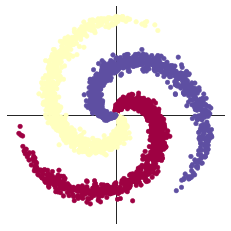

In [7]:
plot_data(X,y)

In [8]:
## Linear model

LR = 1e-3
lambda_l2 = 1e-5

In [9]:
# nn package to create linear model
# each linear module has a weight and bais

model = nn.Sequential(
    nn.Linear(D,H), # 2 dimensional input D, linear map to 100 hidden layer units H
    nn.Linear(H,C) # 100 hidden layer units H, linear map to 3 classes C
)
model.to(device)

# nn package also has different loss functions
criterion = torch.nn.CrossEntropyLoss()

# optim package has different optimizers
optimizer = torch.optim.SGD(model.parameters(), lr = LR, weight_decay=lambda_l2)

# training the model
for t in range(1_000):
    
    # feed forward the logits
    y_pred = model(X)
    
    # compute loss and accuracy
    loss = criterion(y_pred,y)
    score, predicted = torch.max(y_pred, 1)
    
    acc = (y==predicted).sum().float() / len(y)
    print (f"[EPOCH]: {t}, [LOSS]: {loss.item()}, [ACCURACY]: {acc}")
    display.clear_output(wait=True)
    
    # zero the gradients before running backward pass
    optimizer.zero_grad()
    
    # backward pass
    # compute gradient of loss wrt to learnable parameters (hidden)
    loss.backward()
    
    # update parameters
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.8615413308143616, [ACCURACY]: 0.5040000081062317


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


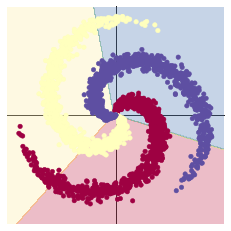

In [10]:
# Plot trained model
print(model)
plot_model(X, y, model)

In [11]:
## Two-layered NN
# Adding non-linearity (ReLU in this case) to allow network to predict non-linear relationships

model = nn.Sequential(
    nn.Linear(D,H),
    nn.ReLU(),
    nn.Linear(H,C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = LR, weight_decay=lambda_l2)

for t in range(1_000):
    
    # feed forward
    y_pred = model(X)
    
    # compute loss
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y==predicted).sum().float() / len(y)
    print (f"[EPOCH]: {t}, [LOSS]: {loss.item()}, [ACCURACY]: {acc}")
    display.clear_output(wait=True)
    
    # zero gradient for backward pass
    optimizer.zero_grad()
    
    # backward pass
    loss.backward()
    
    # update parameters
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.17840710282325745, [ACCURACY]: 0.9486666321754456


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


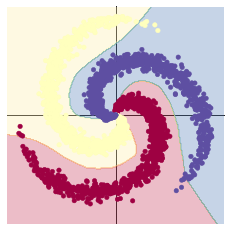

In [12]:
# Plot trained model
print(model)
plot_model(X, y, model)